# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruting_costs`, `salary_grid`.

In [239]:
import psycopg2
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}


###### Гипотеза №1. Есть зависимость между perfomance score и тем, под чьим руководством работает сотрудник.

In [15]:
# Создаю подключение к серверу
conn = psycopg2.connect(**pg_connection)

# Создаю объект курсора
cursor = conn.cursor()

# Создаю запрос в БД в котором выбираю имена менеджеров, оценки производительности и их количество из таблицы hr_dataset
# сгруппировав по имени менеджера и оценкам производительности
sql_str = 'SELECT "Manager Name", "Performance Score", COUNT(*) FROM public.hr_dataset GROUP BY "Manager Name", "Performance Score";'

# Извлекаю запрос
cursor.execute(sql_str)

# Все данные полученные из запроса присваиваю переменной
newlist = cursor.fetchall()

# Сохраняю изменения
conn.commit()

# Закрываю подключение
conn.close()


In [16]:
# Создаю пустой словарь
perf_dict = {}

# Наполняю пустой словарь ключами из имён менеджеров
[perf_dict.update({x[0]:{}}) for x in newlist]

# Просматриваю что получилось
perf_dict

{'Amy Dunn': {},
 'Lynn Daneault': {},
 'Webster Butler': {},
 'David Stanley': {},
 'Simon Roup': {},
 'Brannon Miller': {},
 'Brandon R. LeBlanc': {},
 'Kissy Sullivan': {},
 'Ketsia Liebig': {},
 'Eric Dougall': {},
 'Elijiah Gray': {},
 'Kelley Spirea': {},
 'Janet King': {},
 'Michael Albert': {},
 'Peter Monroe': {},
 'Alex Sweetwater': {},
 'Jennifer Zamora': {},
 'John Smith': {},
 'Board of Directors': {},
 'Debra Houlihan': {},
 'Brian Champaigne': {}}

In [17]:
# Запускаю цикл по данным полученным из БД
for row in newlist:
    # Выбираю из итерации имена менеджеров
    name = row[0]
    
    # Выбираю тип perfomance score
    perf_score = row[1]
    
    # Выбираю количество perfomance score
    count = row[2]
    
    # Наполняю словарь полученный выше значениями итерации
    perf_dict[name].update({perf_score:count})

Text(0, 0.5, 'Managers')

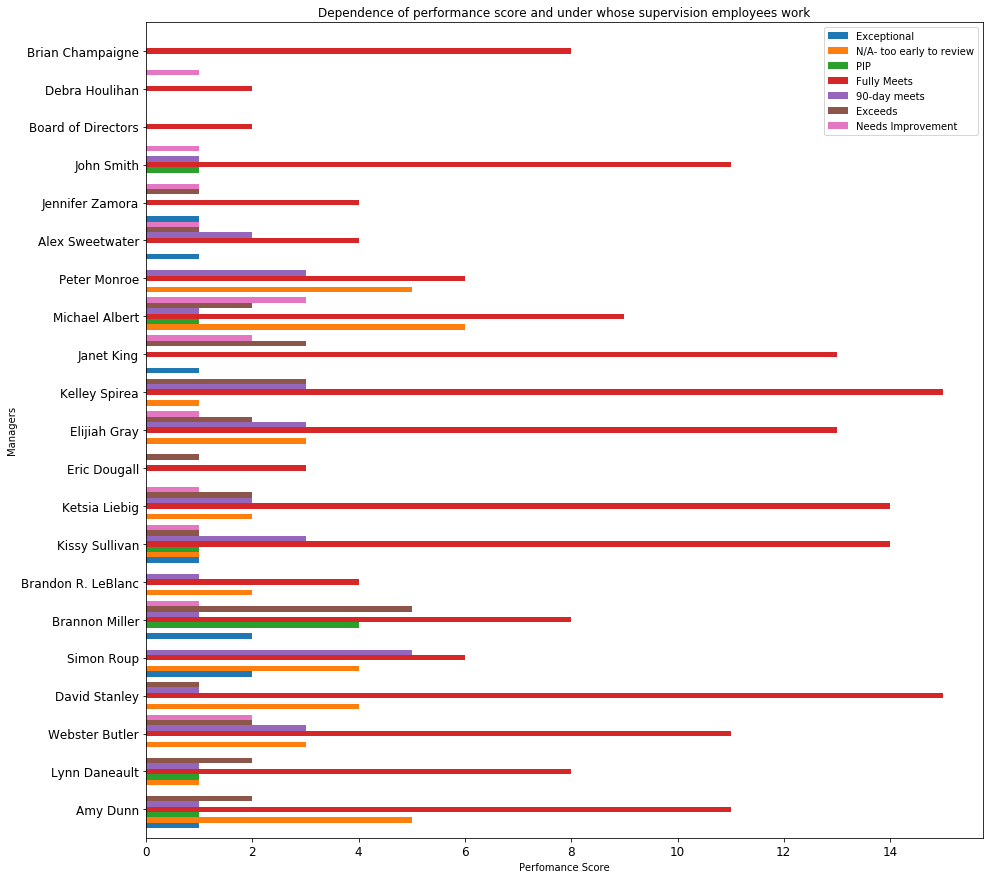

In [97]:
# Конвертирую словарь полученный выше в датасет
data_perf_score = pd.DataFrame(perf_dict).T

# Строю из полученного датасета график
ax = data_perf_score.plot.barh(fontsize=12, figsize=(15,15), width=1, title='Dependence of performance score and under whose supervision employees work')

ax.set_xlabel("Perfomance Score")
ax.set_ylabel("Managers")

###### Практически у всех менеджеров большинство работников полностью соответствуют, 
###### но у Michael Albert сотрудники всех видов успеваемости, что скорее плохо, 
###### т.к. работники которые полностью соответствуют всех бы устроили.

###### В то время как Brian Champaigne курировал 8 человек и все 8 полностью соответствовали.

###### Относительно гипотезы, я считаю что Brian Champaigne показывает, что есть зависимость между perfomance score и тем, под чьим руководством работает сотрудник, т.к. все его сотрудники соответствуют требованиям, скорее всего это именно его заслуга.


###### Гипотеза №2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.

Text(0, 0.5, 'maritalstatusid')

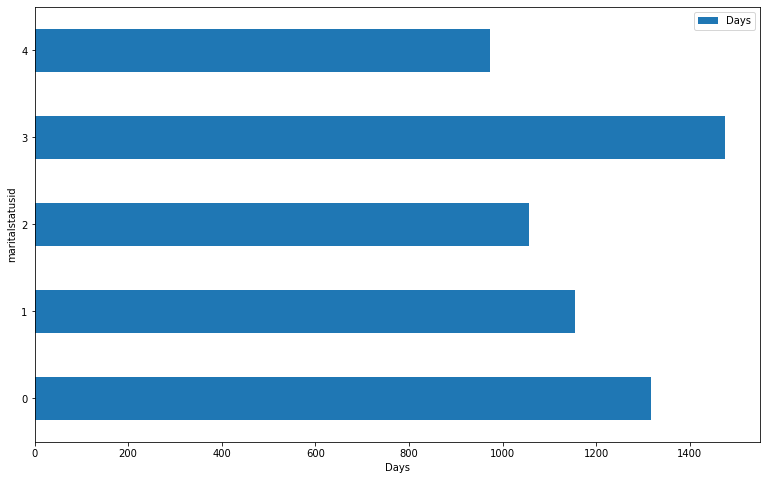

In [95]:
# Создаю подключение к серверу
conn = psycopg2.connect(**pg_connection)

# Создаю объект курсора
cursor = conn.cursor()

# Создаю запрос в БД в котором выбираю имена менеджеров, оценки производительности и их количество из таблицы hr_dataset
# сгруппировав по имени менеджера и оценкам производительности

# Выбираю столбец "maritalstatusid", нахожу медиану в значениях столбца "Days Employed".
sql_str = 'select "maritalstatusid", percentile_disc(0.5) within group (order by public.hr_dataset."Days Employed") from public.hr_dataset GROUP BY "maritalstatusid"'

# Извлекаю запрос
cursor.execute(sql_str)

# Все данные полученные из запроса присваиваю переменной
newlist = cursor.fetchall()

# Сохраняю изменения
conn.commit()

# Закрываю подключение
conn.close()

# Создаю датафрейм из полученных в запросе данных
df = pd.DataFrame(newlist, columns=['maritalstatusid', 'Days']).set_index('maritalstatusid')

# Рисую график
ax = df.plot.barh(figsize=(13, 8), title='the relationship between the duration of work in the company and the marital status of the employee')

# Даю имена осям
ax.set_xlabel("Days")
ax.set_ylabel("maritalstatusid")


###### Дольше всех работают либо те кто не был в браке, либо те кто трижды был в браке.

Text(0, 0.5, 'marriedid')

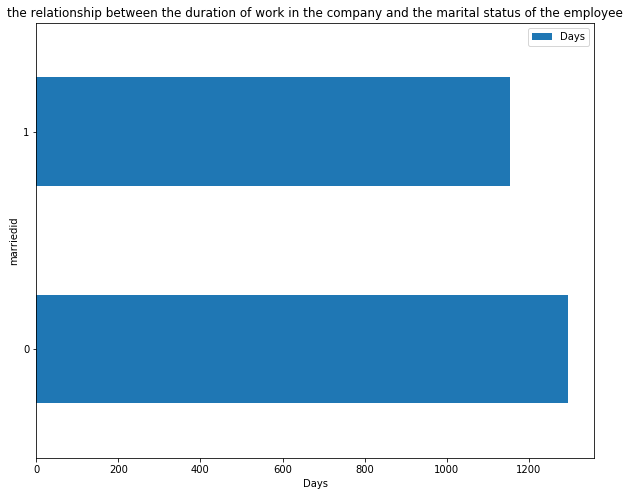

In [103]:
# Создаю подключение к серверу
conn = psycopg2.connect(**pg_connection)

# Создаю объект курсора
cursor = conn.cursor()

# Создаю запрос в БД в котором выбираю имена менеджеров, оценки производительности и их количество из таблицы hr_dataset
# сгруппировав по имени менеджера и оценкам производительности

# Выбираю столбец "marriedid", нахожу медиану в значениях столбца "Days Employed".
sql_str = 'select "marriedid", percentile_disc(0.5) within group (order by public.hr_dataset."Days Employed") from public.hr_dataset GROUP BY "marriedid"'

# Извлекаю запрос
cursor.execute(sql_str)

# Все данные полученные из запроса присваиваю переменной
newlist = cursor.fetchall()

# Сохраняю изменения
conn.commit()

# Закрываю подключение
conn.close()

# Создаю датафрейм из полученных в запросе данных
df = pd.DataFrame(newlist, columns=['marriedid', 'Days']).set_index('marriedid')

# Рисую график
ax = df.plot.barh(figsize=(10, 8), title='the relationship between the duration of work in the company and the marital status of the employee')

# Даю имена осям
ax.set_xlabel("Days")
ax.set_ylabel("marriedid")

###### Те кто не в браке работают на 150 дней дольше.
######  Гипотеза подтвердилась, есть зависимость между продолжительностью работы в компании и семейным положением сотрудника

###### Гипотеза №3. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

Text(0, 0.5, 'Age')

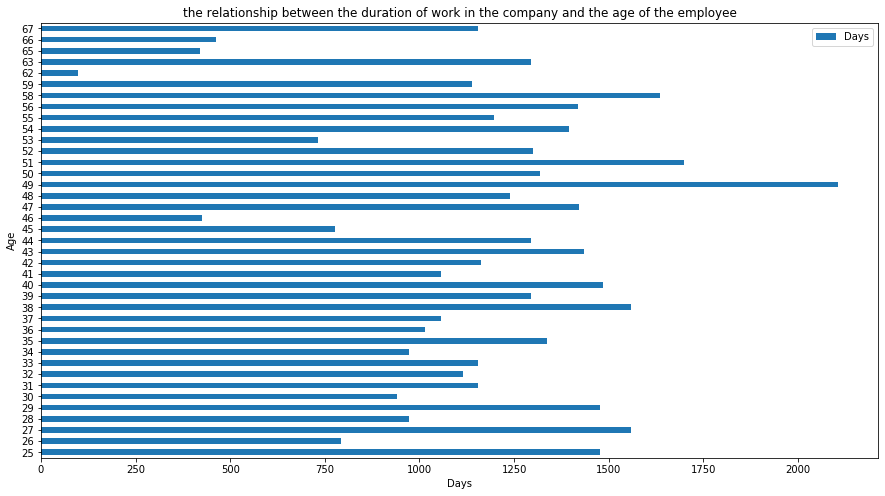

In [102]:
# Создаю подключение к серверу
conn = psycopg2.connect(**pg_connection)

# Создаю объект курсора
cursor = conn.cursor()

# Создаю запрос в БД в котором выбираю имена менеджеров, оценки производительности и их количество из таблицы hr_dataset
# сгруппировав по имени менеджера и оценкам производительности

# Выбираю столбец "maritalstatusid", нахожу медиану в значениях столбца "Days Employed".
sql_str = 'select "age", percentile_disc(0.5) within group (order by public.hr_dataset."Days Employed") as days from public.hr_dataset GROUP BY "age" ORDER BY days'

# Извлекаю запрос
cursor.execute(sql_str)

# Все данные полученные из запроса присваиваю переменной
newlist = cursor.fetchall()

# Сохраняю изменения
conn.commit()

# Закрываю подключение
conn.close()

df = pd.DataFrame(newlist, columns=['Age', 'Days']).set_index('Age').sort_index()

ax = df.plot(kind='barh', figsize=(15,8), title='the relationship between the duration of work in the company and the age of the employee')

ax.set_xlabel("Days")
ax.set_ylabel("Age")

###### Есть зависимость между возрастом и тем сколько они работали, т.к.
###### значительно дольше всех проработали люди которым сейчас 49 лет, они работали 6 лет, т.е. с 43 до 49.
###### Т.е. на работу брать лучше тех сотрудников кому за 40, т.к. они скорее всего знают чего хотят и осмысленно устраиваются на работу.

###### Поэтому считаю что гипотеза подтвердилась!

###### P.S. Ещё прям так и хочется заметить Гауссово распределение на графике выше)))  Но наверное просто хочу его там увидить, а на самом деле его там нет... 

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

In [105]:
# Импортирую библиотеки
import requests
from datetime import datetime, timedelta

# Создал функцию которая извлекает json из спарсенных данных.
def getjson(url):
    response = requests.get(url)
    response = response.json()
    return response

# Сюда нужно ввести свой токен чтобы дальнейший скрипт заработал
vk_token = ## TOKEN ##

new_dict = {}

for i in range(100):
    new_dict[i] = {}
    url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + f'&owner_id=-66669811&offset={i}&count=100&v=5.103'
    response = getjson(url)


    text = response['response']['items'][0]['text']
    likes = response['response']['items'][0]['likes']['count']
    reposts = response['response']['items'][0]['reposts']['count']

    date = response['response']['items'][0]['date']
    dt = (datetime.fromtimestamp(date) - timedelta(hours=0)).strftime('%Y-%m-%d %H:%M:%S')
    
    new_dict[i].update({'text':text,
                        'likes':likes,
                        'reposts':reposts,
                        'time':dt
                       
                       
                       
                       })

    print()
    print('Текст: ', text)
    print()
    print('Лайков: ', likes)
    print('Репостов: ', reposts)
    print('Время публикации: ', dt)
    print('*' * 40)

# В данном участке кода я собираю данные из первых 100 постов и записываю их в словарь.
# Тут же вывожу на печать, чтобы визуально зафиксировать формат вывода.


Текст:  В этот день, 106 лет назад, в американской газете появился первый кроссворд. Ко дню рождения легендарной головоломки подготовили для вас мини-конкурс. Попробуйте разгадать на картинке все термины из области маркетинга.

Пишите ответы в комментариях, а мы среди правильно ответивших выберем победителя. Кому достанется приз от Skillbox, решит генератор случайных чисел.

#Skillbox_маркетинг #Конкурс_Skillbox

Лайков:  10
Репостов:  3
Время публикации:  2019-12-21 11:05:11
****************************************

Текст:  Где искать идеи для стартапа? Возможно ли запустить проект при нулевом бюджете? Какие направления в спортивном менеджменте самые перспективные?
Поговорили об этом с экс-CEO Under Armor и руководителем летнего лагеря ФК «Барселона» Ярославом Савиным. О правилах успеха в спортивном бизнесе читайте в нашем новом интервью.

#Статья_Skillbox

Лайков:  13
Репостов:  0
Время публикации:  2019-12-20 18:16:35
****************************************

Текст:  Новости про бу


Текст:  Хорошенько проморгайтесь, мы подготовили для вас необычную игру 😉 
 
Знаете, что такое стереограммы? Да, это такие картинки, которые при расфокусировке зрения становятся объемными. А еще они тренируют глазные мышцы, так что на минуту отвлекитесь от дел и внимательно посмотрите на изображения. На них мы спрятали иконки известных профессиональных программ. 
 
Чтобы их увидеть, сначала посмотрите выше экрана вдаль и сфокусируйте взгляд на каком-нибудь предмете. Через 20-30 секунд медленно опустите глаза на монитор. Получилось? 
 
Пишите в комментариях, какие иконки разглядели 👇🏻 
 
#Skillbox_дизайн

Лайков:  80
Репостов:  6
Время публикации:  2019-12-11 13:29:57
****************************************

Текст:  Уровень онлайн-образования в России достиг… 
Студенты могут учиться, не посещая пары, если… 
 
Все, больше никаких интриг! Нурлан Киясов, основатель одной из крупнейших в Европе конференций в области новых образовательных технологий EdCrunch, отвечает на наболевшие вопросы


Текст:  Создать или скачать — вот в чем вопрос. Да-да, мы про UI-киты. Объясняем, почему их стоит разрабатывать самостоятельно, и даем пошаговый пример. Читайте в статье.

#Skillbox_дизайн #Статья_Skillbox

Лайков:  61
Репостов:  12
Время публикации:  2019-12-05 17:00:10
****************************************

Текст:  Ко дню рождения Уолта Диснея, «отца» Микки Мауса и рекордсмена по «Оскарам» (26 статуэток!), подготовили для вас обзор на 9 принципов анимации, которые оживят любого мультяшного персонажа. 
 
Эти принципы сформулировали и показали аниматоры студии Disney — Олли Джонстон и Фрэнк Томасон. И хотя все методы предназначались для рисованной мультипликации, они также актуальны и для компьютерной анимации. Смотрите карточки 👇🏻

#Skillbox_дизайн

Лайков:  253
Репостов:  38
Время публикации:  2019-12-05 12:22:09
****************************************

Текст:  Дизайнеры, отвлекитесь от игр со шрифтами. Ловите подборку из семи фильмов и сериалов, которые расширят ваш профессиона


Текст:  Сегодня в прямом эфире пройдет восемнадцатая публичная защита дипломных проектов Skillbox, на которой представят свои работы студенты направления Дизайн, а именно UX-дизайн и Веб-дизайн PRO 2.0. 
Начало в 12:00. 
Подробное расписание мероприятия по ссылке: https://clck.ru/K9PH9 

Приглашаем всех желающих присоединиться к трансляции https://live.skillbox.ru/webinars/online/291119

Лайков:  44
Репостов:  4
Время публикации:  2019-11-29 11:50:00
****************************************

Текст:  Мы знаем, как вы ждали этого дня 😉 Объявляем Черную пятницу! 
 
В этот раз мы объединились с крупнейшими онлайн-школами и университетами и снизили цены на курсы до 50%. Английский, программирование, дизайн, аналитика и другие digital‑скиллы — выбирайте, в чем давно хотели прокачаться! 
 
И помните, что лучшее вложение — это вложение в себя: https://vk.cc/a4ZvUM
 
#Черная_пятница_Skillbox #Распродажа_Skillbox

Лайков:  20
Репостов:  0
Время публикации:  2019-11-29 11:00:02
*****************


Текст:  Подборка шрифтов месяца! 
 
★ MC-Cutter. Экспериментальный шрифт от русского дизайнера Владимира Коломейцева. Поддерживает кириллицу и латиницу, а также цифры и символы: https://kiosk.works 
 
★ Spacegrotesk. Относительно молодая гротескная вариация шрифта Space Mono от дизайнера Флориана Карстена. Поддерживает пять начертаний и отлично подходит для печатной продукции. Посмотреть на шрифт в деле можно здесь: https://fonts.floriankarsten.com/space-grotesk 
 
★ TradeGothic. Шрифт 1948-го года, разработанный Джексоном Бёрком — директором шрифтового отдела в Linotype. Trade Gothic сбалансирован, в нем нет лишних деталей, при этом он не выглядит формальным. Именно поэтому шрифт так популярен в самых разных проектах — от печати до веба: http://www.myfonts.com/fonts/linotype/trade-gothic/ 
 
★ Velour Font Family. Самый элегантный и романтичный шрифт нашей подборки. Особенности гарнитуры: изогнутый горизонтальный штрих у букв «A» и «H» и удлиненные ножки у «K» и «R». Всего шесть начер


Текст:  На этой неделе вас ждет много вебинаров 😎 Научим вас писать рекламные стратегии, прокачаем в креативе и расскажем, как стать мобильным разработчиком. Подробности смотрите на картинке к посту. 
 
Чтобы не пропустить интересующие вас вебинары, подпишитесь на рассылку. Раз в день или раз в неделю мы рассказываем о предстоящих вебинарах, а за 20 минут до начала присылаем ссылку на участие. 
👉 https://vk.com/app6051158_-66669811 
 
Если не сможете принять участие в прямом эфире, смотрите в записи в любое удобное время здесь: 
👉 https://vk.cc/9B4uhq 
 
Желаем продуктивной недели 😉 
 
#Расписание_Skillbox

Лайков:  42
Репостов:  5
Время публикации:  2019-11-18 12:17:12
****************************************

Текст:  Рисовать где угодно, используя минимум инструментов? Можно! Если взять с собой iPad и Apple Pencil. Ловите подборку приложений для рисования на планшете: 
 
★ Procreate. Содержит полный комплект инструментов для профессионального художника. Предлагает широкий набор возм


Текст:  Что такое авторство жизни и в чём высшее предназначение школы? Эти вопросы мы подняли в новом выпуске подкаста «Кант поймёт». 
 
На этот раз беседуют Александра Московская, основатель просветительского проекта [club157210883|ScienceMe] и [id26412125|Федор Шеберстов], сооснователь программы [club88414131|«Учитель для России»], основатель московского офиса Odgers Berndtson. Эта компания — мировой лидер в сфере поиска, оценки и развития руководителей высшего звена. 
 
«Авторство жизни предполагает примат собственной мотивации над внешней. Я верю, что можно преуспеть и в школе, и в жизни без кнута и страха». 
 
Продолжение беседы слушайте здесь: https://vk.com/podcast-66669811_456239179
 
✱✱✱ 
 
Подписывайтесь на канал «Кант поймёт» и слушайте все наши интервью в приложениях «Подкасты» в Apple и Google Play. 
 
#Кант_поймет #Skillbox_образование

Лайков:  76
Репостов:  11
Время публикации:  2019-11-13 09:00:06
****************************************

Текст:  Если вам хоть раз гов

ChunkedEncodingError: ('Connection broken: OSError("(10054, \'WSAECONNRESET\')")', OSError("(10054, 'WSAECONNRESET')"))

In [219]:
import pandas as pd
df = pd.DataFrame(new_dict)
pd.options.display.max_colwidth = 200

# тут я расширяю отображаемую строку до 200 знаков, чтобы можно было прочитать большую часть статьи при необходимости.
# и конвертирую словарь расположенный выше в датафрейм

In [220]:
df.T.sort_values(['likes', 'reposts'], ascending=[False, False]).set_index('time').sort_index()

,text,likes,reposts
time,,,
2019-11-10 19:30:11,"Программисты, собрали вам пять книг для воскресного чтения 😉 Поехали:\n\n ▶︎ «Чистая архитектура», Роберт Мартин. Автор раскрывает свое видение концепций архитектуры и дизайна приложений. Этот тру...",116,14
2019-11-11 11:36:58,"Каждый год количество жертв кибербуллинга в России только растет. Травле в сети подвергаются и взрослые, и дети. \n\nЧтобы привлечь внимание к этой проблеме, наши друзья из Mail.ru совместно с фон...",35,1
2019-11-11 13:30:36,"Ловите расписание прямых эфиров. На этой неделе расскажем о рекламе в соцсетях, научим рисовать логотипы и вместе с вами создадим сайт с нуля. \n\nЧтобы не пропустить интересующие вас вебинары, по...",66,9
2019-11-11 18:46:50,"Эпоха продающих постов подходит к концу, вместо нее наступает эра геймификации. Почему игры в сториз и стикеры в чат-боте круче обычных постов с призывом к действию — рассказал основатель SMM-аген...",71,9
2019-11-12 13:17:16,"Это сейчас дизайн гаджетов стремится к упрощению, а раньше — чем футуристичнее прибор, тем больше у него успех. Предлагаем пройти наш короткий тест и проверить себя, сможете ли вы разглядеть за ди...",26,2
...,...,...,...
2019-12-19 19:05:19,"Как правильно реагировать на оскорбления? Обидеться? Ответить тем же? Заплатить денег и попросить еще? Пример британского художника Мистера Бинго показывает, что последний вариант не такой уж абсу...",33,5
2019-12-20 12:15:19,"Новости про бурное развитие нейросетей невольно напоминают о восстании машин из «Терминатора». Еще бы, они уже столько всего умеют! Писать, рисовать, сочинять музыку, управлять автомобилем.\nНа чт...",50,4
2019-12-20 18:16:35,Где искать идеи для стартапа? Возможно ли запустить проект при нулевом бюджете? Какие направления в спортивном менеджменте самые перспективные?\nПоговорили об этом с экс-CEO Under Armor и руководи...,13,0


In [221]:
df = df.T
df = df.dropna()
df[df.likes > df.likes.median()].sort_values('likes', ascending=False)

# тут я транспонирую датафрейм и удаляю пустые строки, и просматриваю записи где количество лайков больше медианного значения лайков
# сразу бросается в глаза статья для дизайнеров, в которой предлагается посмотреть много поучительных сериалов и фильмов,
# данная статья очень зашла людям, т.к. собрала рекордное количество лайков и репостов.

,text,likes,reposts,time
31,"Дизайнеры, отвлекитесь от игр со шрифтами. Ловите подборку из семи фильмов и сериалов, которые расширят ваш профессиональный кругозор.\n\n#В_закладки_Skillbox #Skillbox_дизайн",622,136,2019-12-04 19:00:01
39,"Некоторые профессии еще не появились, а футурологи уже делают уверенные прогнозы насчет их скорой востребованности. Вот и у компании Microsoft и агентства The Future Laboratory есть свой топ специ...",343,51,2019-12-01 13:00:01
23,"В помощь копирайтерам: собрали сервисы, которые помогают создавать качественные тексты. \n \n➤ Текст.ру. Проверяет текст на уникальность и показывает в процентах, сколько вы сами придумали, а скол...",288,79,2019-12-09 12:19:19
30,"Ко дню рождения Уолта Диснея, «отца» Микки Мауса и рекордсмена по «Оскарам» (26 статуэток!), подготовили для вас обзор на 9 принципов анимации, которые оживят любого мультяшного персонажа. \n \nЭт...",253,38,2019-12-05 12:22:09
36,"Если до сих пор гадаете, какой язык программирования выучить первым (или уже следующим?) — посмотрите ноябрьский рейтинг ЯП от PYPL. ТОП-9 востребованных языков и несколько фактов о каждом из них ...",220,19,2019-12-02 18:10:00
24,Сделать креативную рекламу для куриных яиц не так-то просто. Но агентство Brand Station справилось на 100%. Веселый 3D-мультфильм с детально проработанными персонажами и забавным сюжетом захватыва...,199,8,2019-12-08 19:00:01
41,"Если выдалась свободная минутка между проектами — проведите ее с пользой 😀 Собрали подборку из пяти простых игр, в которых можно прокачать свой глазомер, цветовоспритие и чувство прекрасного. \n \...",198,37,2019-11-30 12:00:04
11,"«Я не играю — я учусь», — так и отвечайте, когда будете рубиться в одну из игр сегодняшней подборки. Все они помогают прокачать навыки управления, лидерские способности и умение принимать стратеги...",190,27,2019-12-15 12:00:02
19,"Рисуете и фотографируете в стол? Почему бы не начать на этом зарабатывать? Подобрали для вас семь фотостоков и составили памятку, как получать деньги за свою работу. Все найдете в статье.\n\n#Skil...",166,28,2019-12-10 18:50:25
58,"Если вы решили стать веб-разработчиком, совместите приятное с полезным. Подобрали пять увлекательных игр, которые научат верстать сайты. \n\n#В_закладки_Skillbox #Skillbox_программирование",153,32,2019-11-22 12:00:07


In [222]:
import re

pattern = r'#\w*'

list_news = ', '.join(map(str, df.text.values))

hashtags = re.findall(pattern, list_news)

# тут я собираю все доступные хештеги в собранных выше постах

In [223]:
unique_hashtags = sorted(list(set(hashtags)))[1:]

# Создаю сортированный список уникальных хештегов полученных выше

In [268]:
hashtag_dict = {}
for i in unique_hashtags:
    hashtag_dict[i] = {'post_count':df[df.text.str.contains(i, regex=False)].likes.count(),
                       
                       'likes_min':df[df.text.str.contains(i, regex=False)].likes.min(),
                       'reposts_min':df[df.text.str.contains(i, regex=False)].reposts.min(),
                       
                       'likes_max':df[df.text.str.contains(i, regex=False)].likes.max(),
                       'reposts_max':df[df.text.str.contains(i, regex=False)].reposts.max(),

                       
                       'likes_mean':df[df.text.str.contains(i, regex=False)].likes.mean(),
                       'reposts_mean':df[df.text.str.contains(i, regex=False)].reposts.mean(),
                       
                       'likes_median':df[df.text.str.contains(i, regex=False)].likes.median(),
                       'reposts_median':df[df.text.str.contains(i, regex=False)].reposts.median(),
                     
}

# Тут я создаю словарь в котором по каждому уникальному хештегу вывожу количество в скольких постах он встречается, 
# минимальное, максимальное, среднее, медианное значения лайков и репостов.

{'#Design_Battle_Skillbox': {'post_count': 3,
  'likes_min': 14,
  'reposts_min': 0,
  'likes_max': 44,
  'reposts_max': 2,
  'likes_mean': 28.333333333333332,
  'reposts_mean': 1.0,
  'likes_median': 27.0,
  'reposts_median': 1.0},
 '#Skillbox_Маркетинг': {'post_count': 1,
  'likes_min': 52,
  'reposts_min': 4,
  'likes_max': 52,
  'reposts_max': 4,
  'likes_mean': 52.0,
  'reposts_mean': 4.0,
  'likes_median': 52.0,
  'reposts_median': 4.0},
 '#Skillbox_Симпсоны': {'post_count': 1,
  'likes_min': 19,
  'reposts_min': 0,
  'likes_max': 19,
  'reposts_max': 0,
  'likes_mean': 19.0,
  'reposts_mean': 0.0,
  'likes_median': 19.0,
  'reposts_median': 0.0},
 '#Skillbox_акция': {'post_count': 1,
  'likes_min': 35,
  'reposts_min': 1,
  'likes_max': 35,
  'reposts_max': 1,
  'likes_mean': 35.0,
  'reposts_mean': 1.0,
  'likes_median': 35.0,
  'reposts_median': 1.0},
 '#Skillbox_в_закладки': {'post_count': 1,
  'likes_min': 136,
  'reposts_min': 21,
  'likes_max': 136,
  'reposts_max': 21,
  

In [269]:
pd.DataFrame(hashtag_dict).T.sort_values(['likes_median', 'reposts_median'],  ascending=[False, False])

# Вывожу на печать датафрейм из полученного словаря выше, 
# сортирую датафрейм по медианным значениям медианного количества лайков и репостов.

# Ниже сделаю аналитические выводы полученные из этого датафрейма.

,post_count,likes_min,reposts_min,likes_max,reposts_max,likes_mean,reposts_mean,likes_median,reposts_median
#В_закладки_Skillbox,12.0,50.0,4.0,622.0,136.0,210.000000,37.083333,171.5,24.0
#Skillbox_в_закладки,1.0,136.0,21.0,136.0,21.0,136.000000,21.000000,136.0,21.0
#Уроки_Skillbox,1.0,130.0,9.0,130.0,9.0,130.000000,9.000000,130.0,9.0
#Фотошопзаминуту,1.0,130.0,9.0,130.0,9.0,130.000000,9.000000,130.0,9.0
#Программирование_Skillbox,1.0,116.0,14.0,116.0,14.0,116.000000,14.000000,116.0,14.0
#Работа_cтудента_Skillbox,1.0,113.0,3.0,113.0,3.0,113.000000,3.000000,113.0,3.0
#Skillbox_взакладки,1.0,112.0,16.0,112.0,16.0,112.000000,16.000000,112.0,16.0
#Skillbox_вдохновляет,3.0,37.0,2.0,199.0,8.0,114.666667,4.000000,108.0,2.0
#Skillbox_управление,7.0,30.0,4.0,190.0,27.0,96.571429,15.428571,104.0,17.0
#Подкасты_Skillbox,1.0,84.0,10.0,84.0,10.0,84.000000,10.000000,84.0,10.0


###### Я выбрал публикации за последий месяц, т.к. тренды меняются и решил проанализировать самый свежий материал.


###### Сделал датафрейм из словаря, который состоит из уникальных хештегов, в который включил значения по количеству хештегов в статьях, максимальном, минимальному, среднему и медианному значению лайков и репостов в статьях под этими хештегами.

###### Из полученного датафрейма видно, что больше всего лайков получают статьи с хештегом #В_закладки_Skillbox и они же чаще всего репостятся. Исходя из этого делаю вывод, что именно такие материалы будут чаще распостраняться в соц.сетях и популиризировать Skillbox, тем самым увеличивать приток новых студентов и увеличивать продажи онлайн-университета Skillbox.

###### Рекомендую SMM отделу поднажать на статьи с хештегом #В_закладки_Skillbox 